# Тестовое задание для Вакансии Главный специалист сектора отчетности

### Описание данных

Схема БД состоит из четырех таблиц:

Product(maker, model, type)

PC(code, model, speed, ram, hd, cd, price)

Laptop(code, model, speed, ram, hd, price, screen)

Printer(code, model, color, type, price)

Таблица Product представляет производителя (maker), номер модели (model) и тип ('PC' - ПК, 'Laptop' - ПК-блокнот или 'Printer' - принтер). Предполагается, что номера моделей в таблице Product уникальны для всех производителей и типов продуктов. В таблице PC для каждого ПК, однозначно определяемого уникальным кодом – code, указаны модель – model (внешний ключ к таблице Product), скорость - speed (процессора в мегагерцах), объем памяти - ram (в мегабайтах), размер диска - hd (в гигабайтах), скорость считывающего устройства - cd (например, '4x') и цена - price. Таблица Laptop аналогична таблице РС за исключением того, что вместо скорости CD содержит размер экрана -screen (в дюймах). В таблице Printer для каждой модели принтера указывается, является ли он цветным - color ('y', если цветной), тип принтера - type (лазерный – 'Laser', струйный – 'Jet' или матричный – 'Matrix') и цена - price.

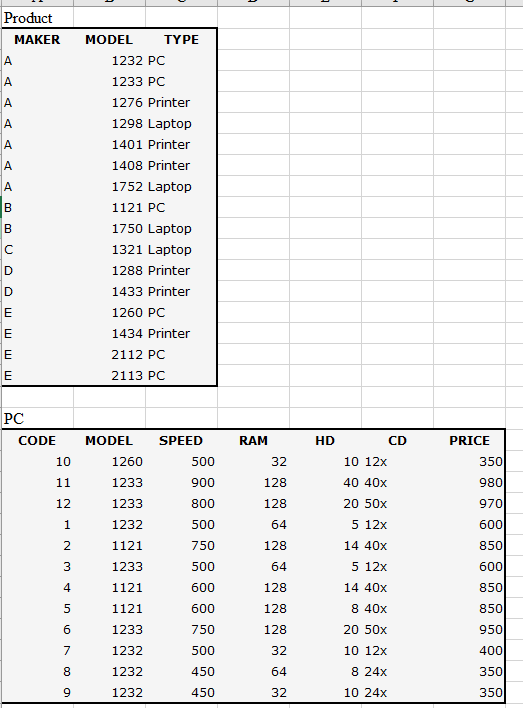

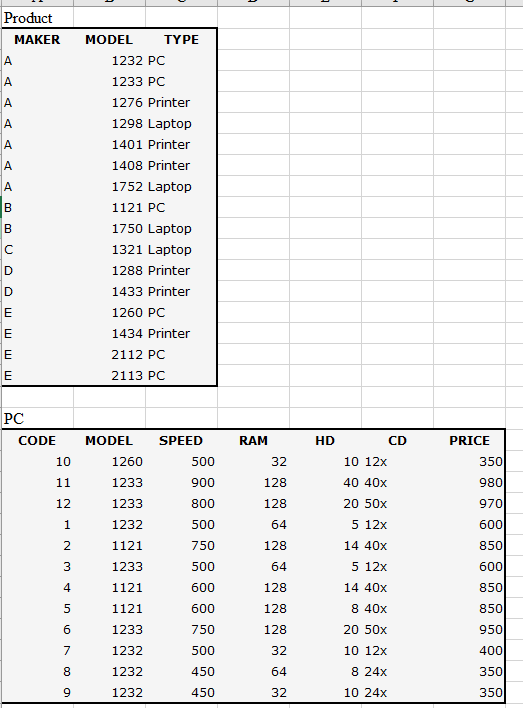

## Задачи

1. Найдите номера моделей и цены всех имеющихся в продаже продуктов (любого типа) производителя B (латинская буква).
2. Найти производителей, которые выпускают только принтеры или только PC.
При этом искомые производители PC должны выпускать не менее 3 моделей.
3. Пронумеровать уникальные пары {maker, type} из Product, упорядочив их следующим образом:
    - имя производителя (maker) по возрастанию;
    - тип продукта (type) в порядке PC, Laptop, Printer.
Если некий производитель выпускает несколько типов продукции, то выводить его имя только в первой строке;
остальные строки для ЭТОГО производителя должны содержать пустую строку символов ('').
4. Найдите производителей самых дешевых цветных принтеров. Вывести: maker, price

###### создаем в PostgresSQL тадлицы

In [ ]:
begin transaction;
 
create table if not exists product (
  maker text    not null,
  model integer not null,
  type  text    not null,
  
  primary key (model)
);
 
insert into product values
  ('A', 1232, 'PC'),
  ('A', 1233, 'PC'),
  ('A', 1276, 'Printer'),
  ('A', 1298, 'Laptop'),
  ('A', 1401, 'Printer'),
  ('A', 1408, 'Printer'),
  ('A', 1752, 'Laptop'),
  ('B', 1121, 'PC'),
  ('B', 1750, 'Laptop'),
  ('C', 1321, 'Laptop'),
  ('D', 1288, 'Printer'),
  ('D', 1433, 'Printer'),
  ('E', 1260, 'PC'),
  ('E', 1434, 'Printer'),
  ('E', 2112, 'PC'),
  ('E', 2113, 'PC');
 
create table if not exists pc (
  code   integer not null,
  model  integer not null,
  speed  integer not null,
  ram    integer not null,
  hd     integer not null,
  cd     text    not null,
  price  integer not null,
  
  primary key (code),
  foreign key (model) references product(model)
);
 
insert into pc values
  (10, 1260, 500, 32, 10, '12x', 350),
  (11, 1233, 900, 128, 40, '40x', 980),
  (12, 1233, 800, 128, 20, '50x', 970),
  (1, 1232, 500, 64, 5, '12x', 600),
  (2, 1121, 750, 128, 14, '40x', 850),
  (3, 1233, 500, 64, 5, '12x', 600),
  (4, 1121, 600, 128, 14, '40x', 850),
  (5, 1121, 600, 128, 8, '40x', 850),
  (6, 1233, 750, 128, 20, '50x', 950),
  (7, 1232, 500, 32, 10, '12x', 400),
  (8, 1232, 450, 64, 8, '24x', 350),
  (9, 1232, 450, 32, 10, '24x', 350);
 
create table if not exists laptop (
  code   integer not null,
  model  integer not null,
  speed  integer not null,
  ram    integer not null,
  hd     integer not null,
  price  integer not null,
  screen integer not null,
  
  primary key (code),
  foreign key (model) references product(model)
);
 
insert into laptop values
  (1, 1298, 350, 32, 4, 700, 11),
  (2, 1321, 500, 64, 8, 970, 12),
  (3, 1750, 750, 128, 12, 1200, 14),
  (4, 1298, 600, 64, 10, 1050, 15),
  (5, 1752, 750, 128, 10, 1150, 14),
  (6, 1298, 450, 64, 10, 950, 12);
 
create table if not exists printer (
  code  integer not null,
  model integer not null,
  color text    not null,
  type  text    not null,
  price integer not null,
  
  primary key (code),
  foreign key (model) references product(model)
);
 
insert into printer values
  (1, 1276, 'n', 'Laser', 400),
  (2, 1433, 'y', 'Jet', 270),
  (3, 1434, 'y', 'Jet', 290),
  (4, 1401, 'n', 'Matrix', 150),
  (5, 1408, 'n', 'Matrix', 270),
  (6, 1288, 'n', 'Laser', 400);
 
commit;

# 1. Найдите номера моделей и цены всех имеющихся в продаже продуктов (любого типа) производителя B (латинская буква).

###### запрос

In [ ]:
SELECT MODEL,PRICE
FROM
	(SELECT MODEL, PRICE
	FROM LAPTOP  
	UNION ALL
	SELECT MODEL, PRICE
	FROM PRINTER 
	UNION ALL
	SELECT MODEL, PRICE
	FROM PC) T
WHERE MODEL IN (SELECT MODEL FROM PRODUCT WHERE MAKER = 'B')


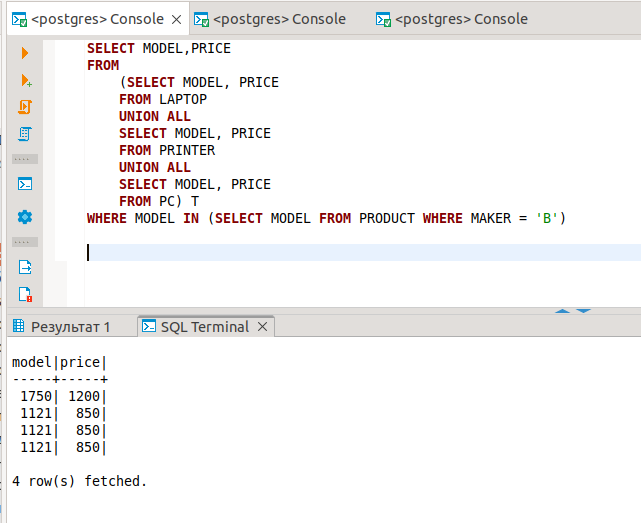

# 2. Найти производителей, которые выпускают только принтеры или только PC.
При этом искомые производители PC должны выпускать не менее 3 моделей.

P.S. уделил внимание на **только** - кто выпускает ПК-блокнот исключаются

In [ ]:
WITH 
PR AS (SELECT MODEL, MAKER
	FROM PRINTER 
	LEFT JOIN PRODUCT 
	USING (MODEL)),
PC1 AS (SELECT MODEL,MAKER, COUNT(PRICE) AS COUNT_PC
	FROM PC
	LEFT JOIN PRODUCT
	USING (MODEL)
	GROUP BY 1,2),

LAP AS
	(SELECT MODEL, MAKER
	FROM LAPTOP
	LEFT JOIN PRODUCT
	USING (MODEL)) 
SELECT MAKER
FROM
	(SELECT DISTINCT MAKER
	FROM  PRODUCT
	WHERE 
	MAKER NOT IN (SELECT MAKER  FROM LAP))Z1
WHERE (MAKER  IN (SELECT MAKER  FROM PR) AND MAKER  NOT IN (SELECT MAKER  FROM PC1) 
	OR MAKER NOT IN (SELECT MAKER  FROM PR) AND MAKER IN (SELECT MAKER  FROM PC1 WHERE COUNT_PC >2) )
	

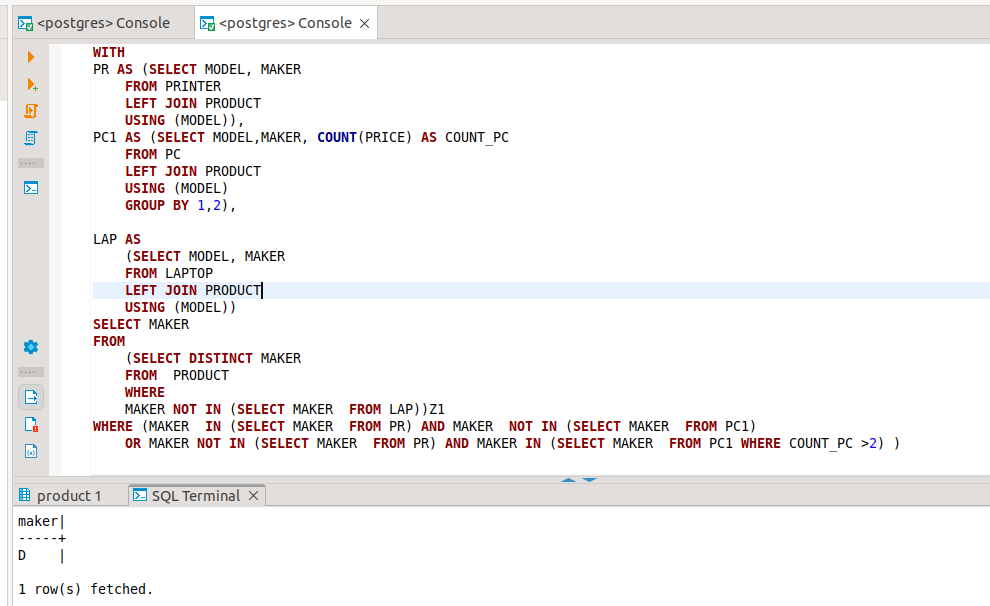

# 3. Пронумеровать уникальные пары {maker, type} из Product, упорядочив их следующим образом:
    - имя производителя (maker) по возрастанию;
    - тип продукта (type) в порядке PC, Laptop, Printer.
Если некий производитель выпускает несколько типов продукции, то выводить его имя только в первой строке;
остальные строки для ЭТОГО производителя должны содержать пустую строку символов ('').

In [ ]:
SELECT PAIR_NUMBER,
	CASE WHEN NUMBER_OF_MAKER = 1 THEN MAKER ELSE '' END MAKER,
	TYPE
FROM (SELECT ROW_NUMBER() OVER (ORDER BY MAKER, LENGTH(TYPE)) AS PAIR_NUMBER,
	ROW_NUMBER() OVER (PARTITION BY MAKER ORDER BY MAKER, LENGTH(TYPE)) NUMBER_OF_MAKER,
	MAKER, TYPE
	FROM (SELECT DISTINCT MAKER,TYPE FROM PRODUCT) T1
ORDER BY MAKER, LENGTH(TYPE)
) T2

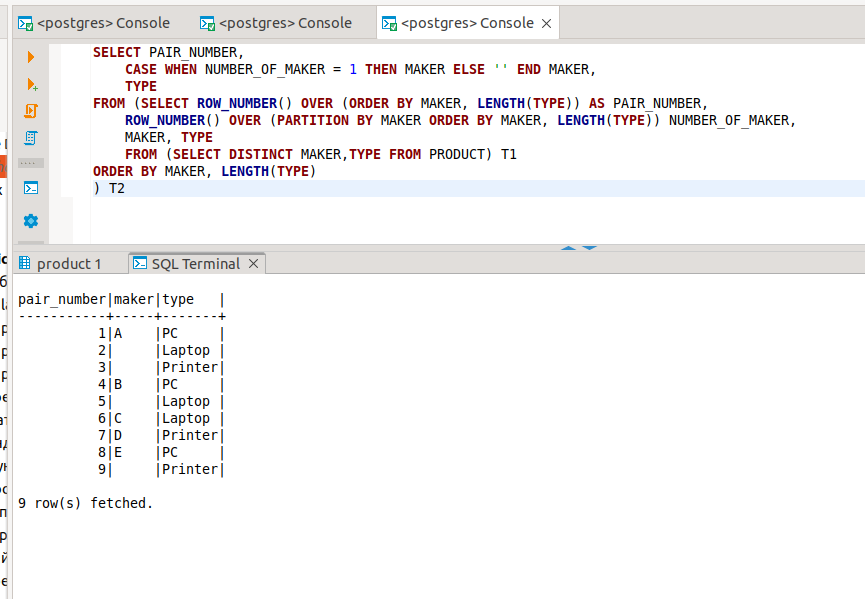

# 4. Найдите производителей самых дешевых цветных принтеров. Вывести: maker, price

In [ ]:
SELECT MAKER,PRICE
FROM PRINTER
LEFT JOIN PRODUCT 
USING(MODEL)
WHERE COLOR = 'y' AND 
	PRICE = (SELECT MIN(PRICE)
			FROM PRINTER
			WHERE COLOR = 'y')

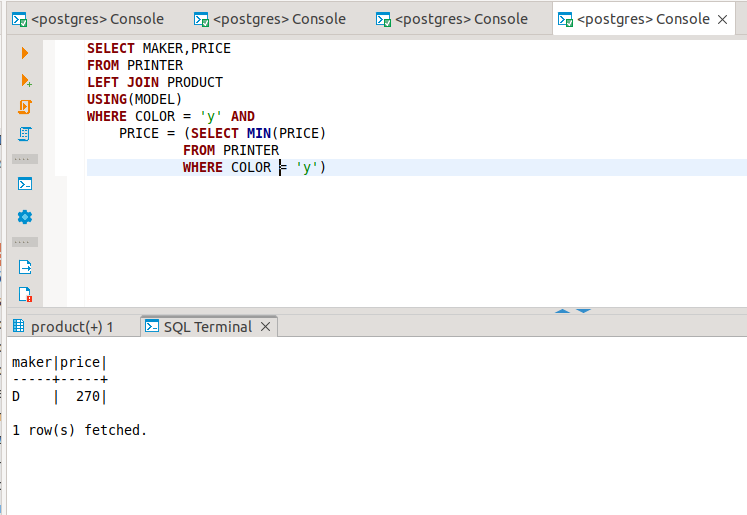

Реализация задания: Сергей Камсарин https://t.me/KamisarNSK

Был бы очень признателен за обратную связь